## Data Analysis using Marvel cinematic Universe data

In [2]:
# loading the required packages

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
marvel = pd.read_csv('charcters_stats.csv')
marvel.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


### data inspection

In [4]:
marvel.shape

(611, 9)

In [5]:
marvel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


In [6]:
marvel.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


In [7]:
marvel.describe(include='all')

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611,608,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
unique,610,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Nova,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,NaN,NaN,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,NaN,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,NaN,NaN,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,NaN,NaN,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000


In [55]:
marvel.describe(include=['object'])

,Name,Alignment
count,611,608
unique,610,3
top,Nova,good
freq,2,432


### EDA

##### Alignment is about whether a character is good, evil or inbetween

In [8]:
# checking how many characters belong in the alignment types

marvel.Alignment.value_counts()

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

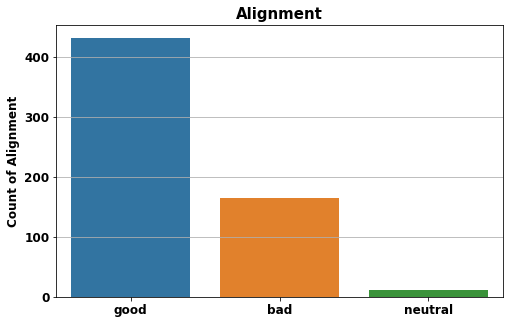

In [9]:
plt.figure(figsize=(8,5))
plt.title("Alignment", fontsize=15, weight='bold')
sns.barplot(data=marvel, x=marvel.Alignment.value_counts().index, y=marvel.Alignment.value_counts().values)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='y')
plt.ylabel('Count of Alignment', weight='bold', fontsize=12)
plt.show()

#### check how fast characters in the repective categories of alignment are and it appears good characters have the highest speed

In [47]:
marvel.groupby('Alignment')['Speed'].sum().sort_values(ascending=False)

Alignment
good       11528
bad         4568
neutral      514
Name: Speed, dtype: int64

#### Selecting data of characters belonging to the Good Alignments for exploration

In [11]:
good = marvel[marvel.Alignment=='good']
good.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


In [12]:
good.shape

(432, 9)

> There are 432 good characters

In [13]:
good.sort_values(by=['Speed'], ascending=False).head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
231,Flash III,good,63,10,100,60,83,32,348
304,Jack of Hearts,good,63,55,100,30,70,30,348
295,Impulse,good,50,10,100,60,63,60,343
525,Stardust,good,88,85,100,110,100,85,568
447,Quicksilver,good,63,28,100,60,57,56,364
232,Flash IV,good,63,10,100,32,59,48,312
537,Superman,good,100,100,100,100,94,85,579
333,Krypto,good,9,80,100,90,72,40,391
229,Flash I,good,63,10,100,50,57,32,312
85,Black Bolt,good,75,67,100,84,100,56,482


> Top 10 fastest characters of the Good Alignment

Since most of the characters have speed of 100, getting all characters with 100 speed

In [14]:
good[good.Speed == 100]

#print(good[good.Speed == 100].shape[0])

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
85,Black Bolt,good,75,67,100,84,100,56,482
229,Flash I,good,63,10,100,50,57,32,312
230,Flash II,good,63,10,100,60,66,32,331
231,Flash III,good,63,10,100,60,83,32,348
232,Flash IV,good,63,10,100,32,59,48,312
295,Impulse,good,50,10,100,60,63,60,343
304,Jack of Hearts,good,63,55,100,30,70,30,348
333,Krypto,good,9,80,100,90,72,40,391
418,Nova,good,38,60,100,100,100,25,423
447,Quicksilver,good,63,28,100,60,57,56,364


#### extracting good characters with the lowest speed

In [15]:
good.sort_values(by=['Speed'], ascending=True).head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
363,Master Brood,good,1,1,1,1,0,1,5
389,Mohinder Suresh,good,1,1,1,1,0,1,5
158,Clea,good,1,1,1,1,0,1,5
392,Monarch,good,1,1,1,1,0,1,5
161,Colin Wagner,good,1,1,1,1,0,1,5
162,Colossal Boy,good,1,1,1,1,0,1,5
498,Silk Spectre II,good,1,1,1,1,0,1,5
164,Corsair,good,1,1,1,1,0,1,5
148,Cerebra,good,1,1,1,1,0,1,5
165,Crimson Crusader,good,1,1,1,1,0,1,5


In [61]:
good[(good.Name == 'Hulk') 
     | (good.Name == 'Iron Man') 
     | (good.Name == 'Captain America') 
     | (good.Name == 'Thor') 
     | (good.Name == 'Black Panther') 
     | (good.Name == 'Hawkeye')
    | (good.Name == 'Black Widow')
    | (good.Name == 'Spiderman')
    | (good.Name == 'Falcon')
    | (good.Name == 'Shang-Chi')
    ]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
93,Black Panther,good,88,16,30,60,41,100,335
94,Black Widow,good,75,13,27,32,32,100,279
133,Captain America,good,63,19,35,56,46,100,319
217,Falcon,good,38,13,50,28,22,64,215
271,Hawkeye,good,50,12,23,14,26,80,205
288,Hulk,good,88,100,47,100,41,85,461
299,Iron Man,good,100,85,58,85,100,64,492
489,Shang-Chi,good,63,12,30,50,25,100,280
522,Spiderman,good,1,1,1,1,0,1,5
546,Thor,good,69,100,92,100,100,85,546


#### Extracting good characters with speed within 80-99

In [17]:
good[(good.Speed > 79) & (good.Speed < 100)]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
48,Aurora,good,50,15,83,56,69,56,329
183,Dash,good,9,4,83,42,12,28,178
324,Kid Flash,good,25,4,92,42,13,30,206
350,Luna,good,38,6,83,14,53,14,208
361,Martian Manhunter,good,100,100,96,100,100,85,581
416,Northstar,good,50,18,83,56,70,70,347
499,Silver Surfer,good,63,100,84,101,100,32,480
534,Superboy,good,75,95,83,90,84,60,487
536,Supergirl,good,94,98,92,100,85,75,544
546,Thor,good,69,100,92,100,100,85,546


In [18]:
# sorting good characters by power

good.sort_values(by=['Power'], ascending=False).head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
609,Zatanna,good,75,10,23,28,100,56,292
546,Thor,good,69,100,92,100,100,85,546
511,Spawn,good,75,60,50,90,100,95,470
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
499,Silver Surfer,good,63,100,84,101,100,32,480
487,Shadow King,good,75,12,27,100,100,75,389
85,Black Bolt,good,75,67,100,84,100,56,482
435,Plastic Man,good,50,63,23,100,100,56,392
433,Phoenix,good,100,80,67,100,100,70,517


#### sorting by Total

In [19]:
good.sort_values(by = ['Total'], ascending=False).head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
537,Superman,good,100,100,100,100,94,85,579
525,Stardust,good,88,85,100,110,100,85,568
546,Thor,good,69,100,92,100,100,85,546
536,Supergirl,good,94,98,92,100,85,75,544
417,Nova,good,100,85,67,101,100,85,538
251,Goku,good,56,100,75,90,100,100,521
306,Jean Grey,good,100,80,67,100,100,70,517
433,Phoenix,good,100,80,67,100,100,70,517
299,Iron Man,good,100,85,58,85,100,64,492


In [21]:
good_max_power = good.sort_values(by=['Total'], ascending=False)
good_max_power.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
537,Superman,good,100,100,100,100,94,85,579
525,Stardust,good,88,85,100,110,100,85,568
546,Thor,good,69,100,92,100,100,85,546
536,Supergirl,good,94,98,92,100,85,75,544


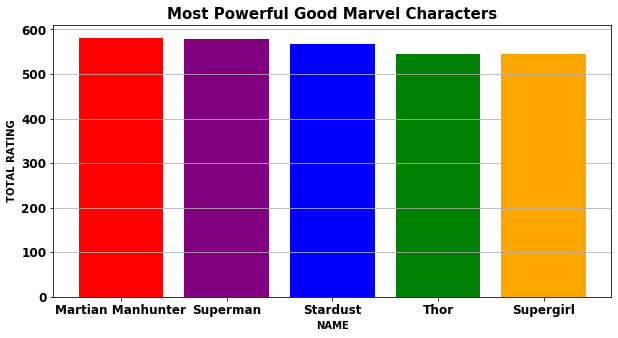

In [34]:
c = ['red', 'purple', 'blue', 'green', 'orange']

plt.figure(figsize=(10,5))
plt.title('Most Powerful Good Marvel Characters', fontsize=15, weight='bold')
plt.bar(list(good_max_power['Name'])[:5], list(good_max_power['Total'])[:5], color=c)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.xlabel('NAME', fontsize=10, weight='bold')
plt.ylabel('TOTAL RATING', fontsize=10, weight='bold')
plt.grid(axis='y')
plt.show()

### Exploring Characters from Bad Alignment

In [28]:
bad = marvel[marvel.Alignment == 'bad']
bad.head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5
21,Angela,bad,1,1,1,1,0,1,5
23,Annihilus,bad,75,80,47,56,59,64,381
26,Anti-Monitor,bad,88,90,38,90,100,90,496
27,Anti-Spawn,bad,1,1,1,1,0,1,5
29,Apocalypse,bad,100,100,33,100,100,60,493


#### extracting bad characters according to their speed

In [29]:
bad.sort_values(by = 'Speed', ascending=False).head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
610,Zoom,bad,50,10,100,28,72,28,288
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
535,Superboy-Prime,bad,94,100,100,100,100,85,579
242,General Zod,bad,94,100,96,100,94,95,579
171,Cyborg Superman,bad,75,93,92,100,100,80,540
84,Black Adam,bad,88,100,92,100,89,56,525
203,Dormammu,bad,88,95,83,100,100,80,546
205,Ego,bad,88,80,83,99,71,28,449
218,Fallen One II,bad,88,85,83,100,100,56,512


#### exploring intelligence of bad characters

In [31]:
bad.sort_values(by = 'Intelligence', ascending=False).head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
338,Lex Luthor,bad,100,10,12,14,10,28,174
336,Leader,bad,100,10,12,14,58,42,236
122,Brainiac,bad,100,28,63,90,60,75,416
194,Doctor Doom,bad,100,32,20,100,93,84,429
360,Mandarin,bad,100,28,23,28,99,95,373
29,Apocalypse,bad,100,100,33,100,100,60,493
315,Joker,bad,100,10,12,56,22,90,290
321,Kang,bad,100,48,58,70,71,70,417
449,Ra's Al Ghul,bad,100,28,32,42,27,100,329


#### exploring bad characters by Total ability

In [33]:
bad.sort_values(by='Total', ascending=False).head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
535,Superboy-Prime,bad,94,100,100,100,100,85,579
242,General Zod,bad,94,100,96,100,94,95,579
16,Amazo,bad,75,100,100,100,100,100,575
203,Dormammu,bad,88,95,83,100,100,80,546
201,Doomsday,bad,88,80,67,120,100,90,545
171,Cyborg Superman,bad,75,93,92,100,100,80,540
219,Faora,bad,88,95,75,100,87,90,535
356,Magus,bad,88,100,70,99,100,74,531
5,Abraxas,bad,88,100,83,99,100,56,526
84,Black Adam,bad,88,100,92,100,89,56,525


In [35]:
bad_max_power = bad.sort_values(by='Total', ascending=False)

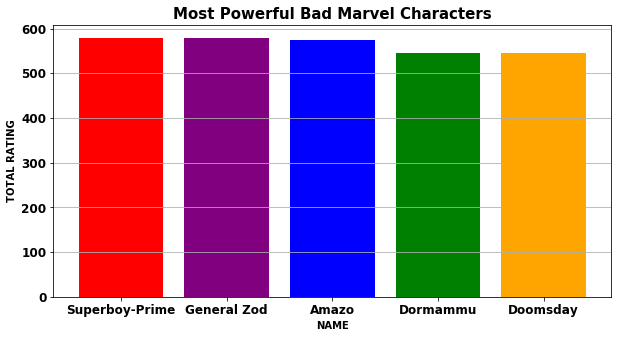

In [36]:
c = ['red', 'purple', 'blue', 'green', 'orange']

plt.figure(figsize=(10,5))
plt.title('Most Powerful Bad Marvel Characters', fontsize=15, weight='bold')
plt.bar(list(bad_max_power['Name'])[:5], list(bad_max_power['Total'])[:5], color=c)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.xlabel('NAME', fontsize=10, weight='bold')
plt.ylabel('TOTAL RATING', fontsize=10, weight='bold')
plt.grid(axis='y')
plt.show()

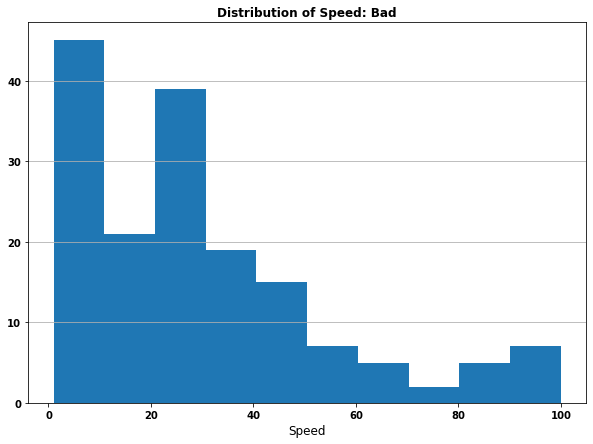

In [49]:
# histogram of speed for good characters

plt.figure(figsize=(10, 7))
plt.hist(bad.Speed)
plt.title('Distribution of Speed: Bad', weight='bold')
plt.xlabel('Speed', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.grid(axis='y')
plt.show()

#### Histogram interpretaton

> About 40+ bad characters have speed within the range of 0-10. The second highest majority of them have speed within the range of 20-30. Very few have speed around 100.

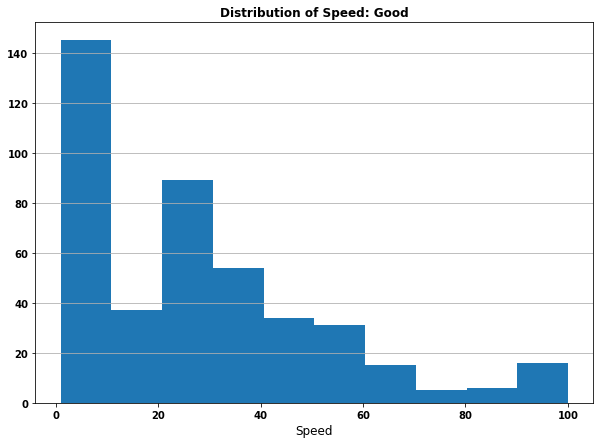

In [52]:
# histogram of speed for good characters

plt.figure(figsize=(10, 7))
plt.hist(good.Speed)
plt.title('Distribution of Speed: Good', weight='bold')
plt.xlabel('Speed', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.grid(axis='y')
plt.show()

> A great majority of good characters, more than 140, have speed within the range of 0-10. The second majority have speed within 20-30 with a few, but more than bad characters having speed close and around 100.

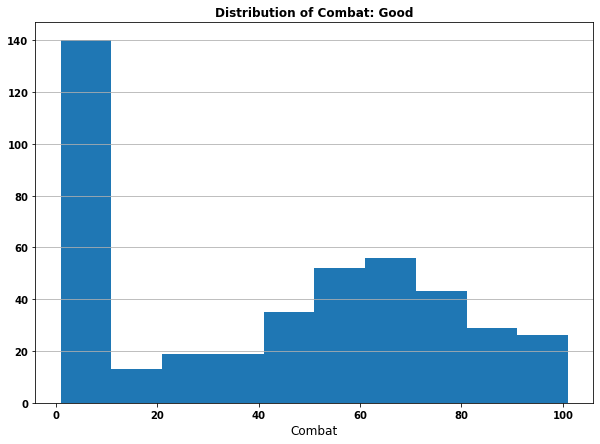

In [51]:
# histogram of Combat for good characters

plt.figure(figsize=(10, 7))
plt.hist(good.Combat)
plt.title('Distribution of Combat: Good', weight='bold')
plt.xlabel('Combat', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.grid(axis='y')
plt.show()

> About 140 good characters have combat skills from 0-10. A high majority is within thte range of 40-90.

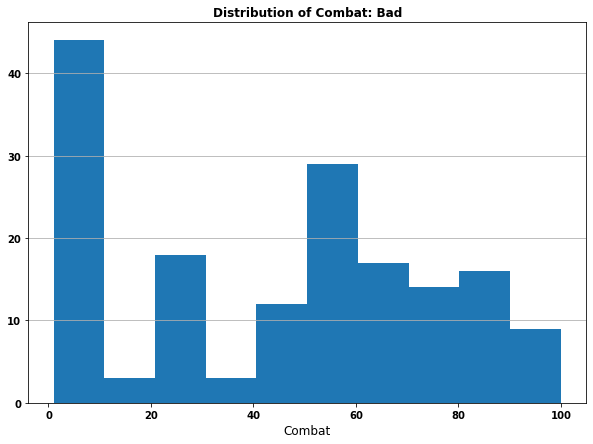

In [53]:
# histogram of Combat for bad characters

plt.figure(figsize=(10, 7))
plt.hist(bad.Combat)
plt.title('Distribution of Combat: Bad', weight='bold')
plt.xlabel('Combat', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.grid(axis='y')
plt.show()